In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("../data/uso.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-04-10,546.000000,548.000000,541.359985,544.159973,544.159973,484738
1,2006-04-11,546.559998,547.119995,538.400024,545.599976,545.599976,162138
2,2006-04-12,545.760010,550.479980,542.479980,542.719971,542.719971,156038
3,2006-04-13,540.000000,551.919983,539.200012,550.559998,550.559998,70088
4,2006-04-17,553.599976,559.200012,549.440002,558.320007,558.320007,114713


## Outlier Analysis

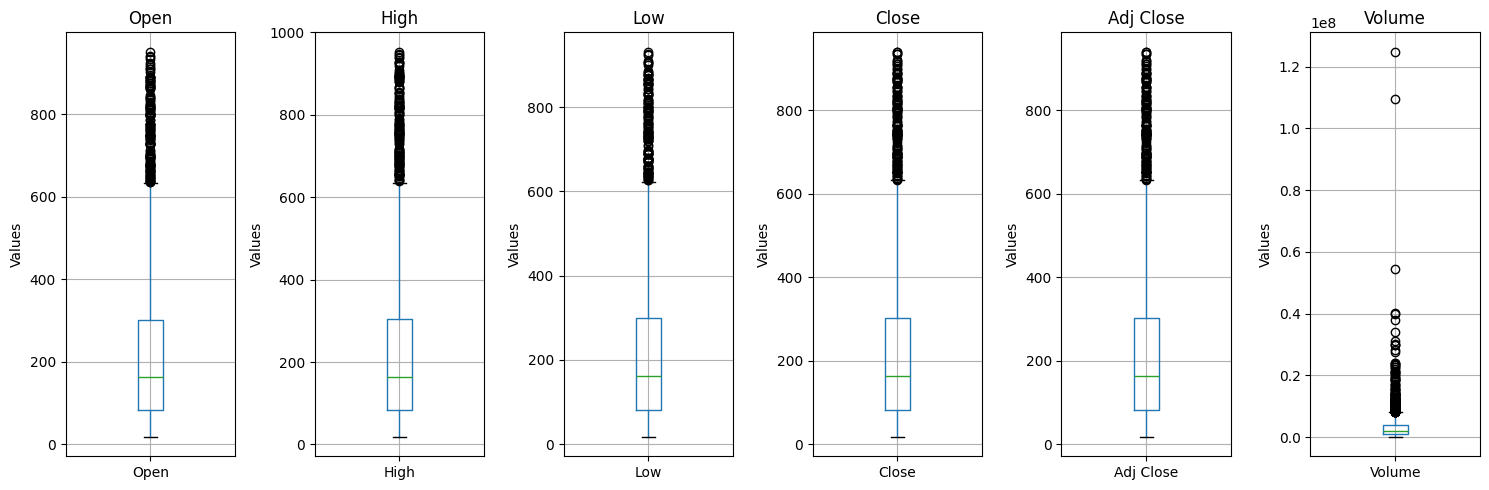

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns) - 1, figsize=(15, 5))

# Plot box plots for each column
numeric_columns = df.select_dtypes(include=['number']).columns
for i, column in enumerate(numeric_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel("Values")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [15]:
# Calculate z-scores for each numeric column
z_scores = pd.DataFrame()
for column in numeric_columns:
    z_scores[column] = stats.zscore(df[column])

# Set a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Get an array of outlier values for each column

print(f"Number of rows: {df.shape[0]}")
for column in numeric_columns:
    column_outliers = df[column][outliers[column]].tolist()
    print(f"Outliers in {column}: {len(column_outliers)}")


Number of rows: 4419
Outliers in Open: 84
Outliers in High: 82
Outliers in Low: 80
Outliers in Close: 80
Outliers in Adj Close: 80
Outliers in Volume: 45


### Splitting the Data into Train and Test
The fitting of normalization should only be done on the training data!

In [16]:
X = df[['Open', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df[['High']]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3535, 5)
X_test shape: (884, 5)
y_train shape: (3535, 1)
y_test shape: (884, 1)


### Normalization Technique 1: Min-Max Scaling
**Pros:** 
 - Retains the shape of the original distribution
 - Useful when distribution of the data is unknown or not Gaussian (our case)

**Cons:** 
 - Sensitive to outliers
 - May not preserve the relationships betweem the data points

In [19]:
# Only fit the normalizers on the training data!
X_norm = MinMaxScaler().fit(X_train)
y_norm = MinMaxScaler().fit(y_train)

X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

y_train_norm = y_norm.transform(y_train)
y_test_norm = y_norm.transform(y_test)

Coefficients: [[ 0.70365525 -0.42834519  0.36529237  0.36529237  0.00847201]]
Intercept: [-0.00105502]
Mean Squared Error: 3.5041401893269066


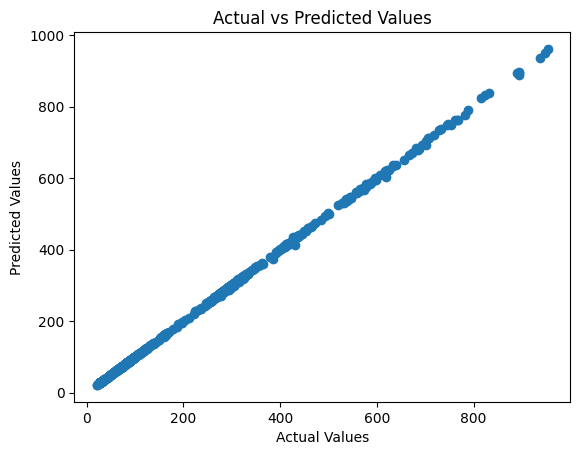

In [22]:
# Train a simple linear regression model to test efficacy
regressor = LinearRegression()
regressor.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = regressor.predict(X_test_norm)

# Inverse transform the scaled predictions to get the original scale
y_pred = y_norm.inverse_transform(y_pred_norm)

# Print the coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Normalization Technique 2: Standardization

**Pros:** 
 - Less sensitive to outliers
 - Preserves relationships between data points

**Cons:** 
 - Changes shape of original distribution
 - Works best if we expect the data to be a Gaussian-like distribution, not really the case in our scenario

In [23]:
# Only fit the normalizers on the training data!
X_norm = StandardScaler().fit(X_train)
y_norm = StandardScaler().fit(y_train)

X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

y_train_norm = y_norm.transform(y_train)
y_test_norm = y_norm.transform(y_test)

Coefficients: [[ 0.6966951  -0.42466117  0.36427919  0.36427919  0.00151002]]
Intercept: [-1.03164692e-16]
Mean Squared Error: 3.5041401893269795


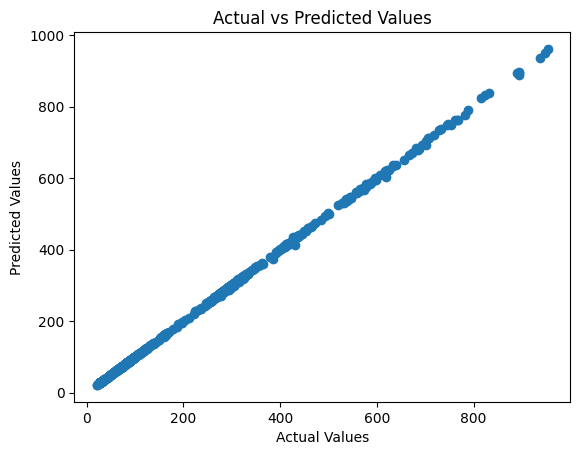

In [24]:
# Train a simple linear regression model to test efficacy
regressor = LinearRegression()
regressor.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = regressor.predict(X_test_norm)

# Inverse transform the scaled predictions to get the original scale
y_pred = y_norm.inverse_transform(y_pred_norm)

# Print the coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()